<a href="https://colab.research.google.com/github/dunyashina/ohwowitsrepository/blob/main/%D0%94%D1%83%D0%BD%D1%8F%D1%88%D0%B8%D0%BD%D0%B0_2%D0%BB%D0%B0%D0%B1%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

РИ-481223_Дуняшина_Мария

- Реализовать kmeans
- Визуализировать сходимость центров кластеров
- Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from abc import ABC, abstractmethod
from collections import Counter
from sklearn.datasets import make_blobs

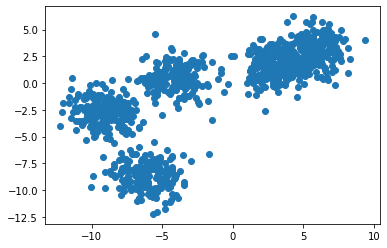

In [6]:
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [7]:
class BaseEstimator(ABC):
  @abstractmethod
  def fit(self):
    pass

  @abstractmethod
  def predict(self):
    pass

In [16]:
class KMeans(BaseEstimator):

  def __init__(self, n_clusters=3, eps=.001, max_iter=300, seed=42):
    self.n_clusters = n_clusters
    self.eps = eps
    self.max_iter = max_iter
    self.seed = seed

  def _euclidean_distance(self, obj, data):
    return np.sum((obj - data) ** 2, axis=1)

  def _init_centroids(self, data, n_clusters, seed):
    np.random.seed(self.seed)
    init_indices = np.random.choice(data.shape[0], size=n_clusters)
    return init_indices

  def _calculate_clusters(self, data, centroids):
    data_clusters = []
    for obj in data:
        distances = self._euclidean_distance(obj, centroids)
        data_clusters.append(np.argmin(distances))
    return data_clusters
  def _sse(self, data, centroid):
    return np.sum((data - centroid) **2)
  def fit(self, data):
    centroids_inds = self._init_centroids(data, self.n_clusters, self.seed)
    self.centroids = data[centroids_inds, :]
    for i in range(self.max_iter):
      errors_list = []
      data_clusters = self._calculate_clusters(data, self.centroids)
      old_centroids = self.centroids.copy()
      for cluster in range(self.n_clusters):
        data_in_cluster = data[np.where(np.array(data_clusters) == cluster)]
        self.centroids[cluster] = data_in_cluster.mean(axis=0)
        errors_list.append(self._sse(data_in_cluster, self.centroids[cluster]))
      self.SSE = np.array(errors_list).mean()
      if (abs(self.centroids - old_centroids < self.eps).all()):
        return
    return
  def predict(self, data):
    data_clusters = self._calculate_clusters(data, self.centroids)
    return np.array(data_clusters)
  def fit_predict(self, data):
    self.fit(data)
    return self.predict(data)


In [8]:
km = KMeans()
km.fit(X)
clusters = km.predict(X)

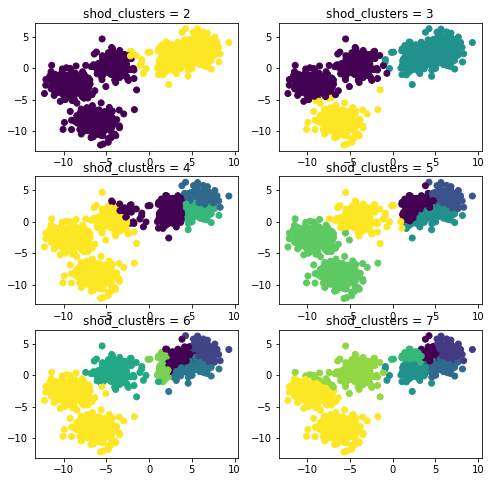

In [46]:
plt.figure(figsize=(8, 8))
for shod_c in range(2, 8):
    k_means = KMeans(n_clusters=shod_c)
    
    clusters = k_means.fit_predict(X)
    plt.subplot(3, 2, shod_c-1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title('shod_clusters = {}'.format(shod_c))
plt.show()

In [38]:
def drawSSEPlotManual(data, n_clusters=8, max_iter=300, eps=.001, seed=42):
    sse_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, eps=eps, seed=seed)
        km.fit_predict(data)
        sse_values.append(km.SSE)
        
    plt.figure(figsize=(8, 8))
    plt.plot(range(1, n_clusters+1), sse_values, color='black')
   
    plt.xlabel('number of clusters')
    plt.ylabel('SSE')
  
    plt.grid()
    plt.show()


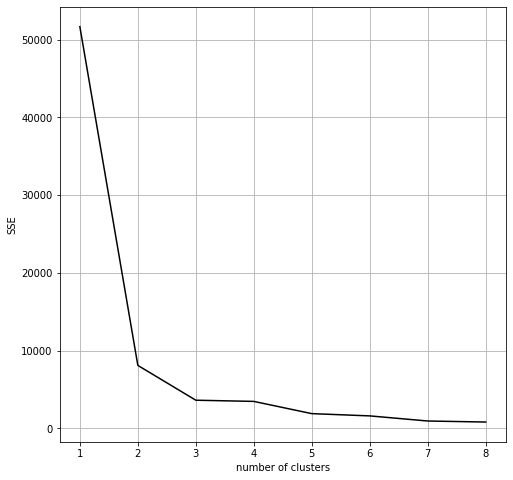

In [39]:
drawSSEPlotManual(X)